In [9]:
###### Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.display import Video
from scipy.io import wavfile
from Kildekode._07_Frekvensanalyse import *

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Frekvensanalyse med DFT del 2

* **Emne AIS2201 - Signalbehandling**
* **Uke 38, 2024**
* **Underviser: Kai Erik Hoff**

# Tema 

* Repetisjon spektral lekkasje, vindusfunksjoner og zero padding
* Diskret-Tids Fouriertransformasjon (DTFT)
* Vindusfunksjoner i Frekvensplanet
* Kort om ulike vindusfunksjoner

# Spektral lekkasje

* DFT av $N$ sampler fra et signal $x[n]$ vil i realiteten finne en måte å dekomponere akkurat disse $N$ samplene til $x[n]$ i $N$ frekvenskomponenter med digital frekens $\hat{\omega}_m = \Delta \hat{\omega}\cdot m = 2\pi \frac{m}{N}$.
* Dersom signalet $x[n]$ inneholder frekvenskomponenter med frekvens $\hat{\omega} \notin \hat{\omega}_m$, vil vi få spektral lekkasje.
    * Vi vil få utslag i en rekke frevkenser $\hat{\omega}_k$ som kompenserer for frekvenskomponenten som ikke er "på lista".
    * Størst utslag vil finne sted der $\hat{\omega}_k$ er nærmest $\hat{\omega}$.

* *Årsaken til at dette skjer blir tydelig når vi forsøker å rekonstruere den analoge bølgeformen til $x(t)$ med utgangspunkt i DFT-sekvensen $X[m]$.*

* Rekonstruksjon av analogt signal kan utføres ved å anse $X[m]$ som fourierrekke-koeffisienter $a_m=A_m\cdot e^{j\phi_m}$ for $0\leq m \leq \frac{N}{2}$, og generere et analogt signal med følgende formel:
$$x(t) = X[0] + 2\cdot \sum_{k=1}^{N/2} |X[m]| \cdot \cos\left(2\pi \frac{m\cdot f_s}{N}\cdot t + \angle X[m]\right)$$

## Signalrekonstruksjon illustrert 
* Figuren viser rekonstruert signal med utangspunkt i 32-punkts DFT
* *Bruker for enkelhets skyld $f_s = N = 32$ for eksempelet*

<img src="Figurer/07_Frekvensanalyse/Fig1_SpecLeakTimeDomain.png" style="width: 80%; margin-left: 100px" />

## Demo spektral lekkasje

Output()

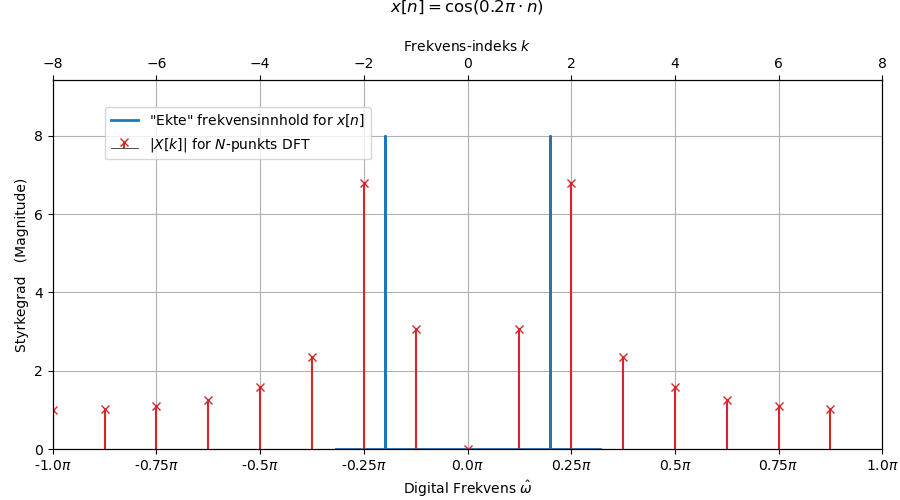

In [6]:
SpectralLeakageDemo(figsize=(9,5)); # Figurstørrelsen kan endres for å tilpasse dokumentvisning.

# Vindusfunksjoner

* En ***vindusfunksjon*** er et nyttig verktøy for å redusere konsekvensene av spektral lekkasje.
    * Med en spesiell manipulasjon av signalutklippet fra $x[n]$ *før* utregning av DFT, kan vi endre frekvensinnholdet i ønsket retning.
    * Vindusfunksjonen vil påføre en vekting av hver sample $x[n]$ avhengig av sampleverdien $n$.
    * Samplene nære "kantene" på vinduet vil krympes, slik at differansen mellom $x[0]$ og $x[N-1]$ blir minimal. 
    * Dette fjerner kunstige "sprang" i det hypotetiske periodiske signalet vi *faktisk* finner frekvensinnholdet til.

# Eksempel: hann vindu

### $$ w[n] = \begin{cases}
0.5 - 0.5 \cos \left( 2\pi \frac{n}{N} \right) \ \ ,& 0 \leq n <N \\
0, & \text{Otherwise}
\end{cases}$$

<img src="Figurer/07_Frekvensanalyse/Fig2_HannWindow.png" style="width: 80%; margin-left: 100px" />

# Zero padding
* Metode for å få flere frekvenssampler uten å øke vinduslengden.
* "padder" signalet med nullsampler bak signalutklippet.
    * Dersom man bruker vindusfunksjon, gjøres dette *før* zero padding.
* Vi regner så ut DFT av det nye utvidede signalet.
    * Oppløsningen til DFT vil være like stor som antallet sampler i signalet etter zero padding

<img src="Figurer/07_Frekvensanalyse/Fig3_ZeroPadding.jpg" style="width: 80%; margin-left: 100px" />

# Analyse av vindusfunksjoner
* Det finnes andre vindusfunksjoner enn *hann*-vindu vi kan bruke.
* Aktuelt å kartlegge hvordan vindusfunksjoner oppfører seg i frekvensdomenet.

# Diskret-tids Fouriertransformasjon (DTFT)

* Matematisk Transformasjon for å finne et ***kontinuerlig funksjonsuttrykk*** for frekvensinnholdet til et digitalt signal $x[n]$.
    * Informasjon om ***alt*** frekvensinnholdet til et signal, ikke bare et endelig antall sampler.

<img src="Figurer/07_Frekvensanalyse/Fig4_DTFT1.png" style="width: 80%; margin-left: 100px" />

# Diskret-tids Fouriertransformasjon

* Formel:
### $$X\left(\hat{\omega}\right) = \sum_{n=-\infty}^{\infty} x[n]\cdot e^{-j\hat{\omega}\cdot n}$$

* $X\left(\hat{\omega}\right)$ er et *kontinuerlig* funksjonsuttrykk.
    * Regner ut frekvensinnholdet for et digitalt signal $x[n]$.
    * Forutsetter at signalet $x[n]$ kan beskrives som et matematisk funksjonsuttrykk.
    
    
* Samme grunnprinsipp som for FT, DFT; frekvensforskyv ved hjelp av frekvensmiksing, og regn ut areal/sum.

# Invers DTFT
* Formel:
$$ x[n] = \frac{1}{2\pi} \int_{-\pi}^{\pi}X\left(\hat{\omega}\right)\cdot e^{j\hat{\omega}\cdot n}$$

* Ettersom $X\left(\hat{\omega}\right)$ er *kontinuerlig*, bruker vi her et *integral*.
    * Deler på $2\pi$ ettersom "frekvens-spennet" er $-\pi < \hat{\omega} < \pi$.



# Sentrale matematiske funksjonsuttrykk
* Vi må først definere et par elementere funksjonsuttrykk
    * Impulsfunksjon
    * Enhetsstegfunksjon
    
    
* Basis-signal for analyse av signal og system

# Dirac's Deltapuls

<img src="Figurer/07_Frekvensanalyse/Fig5_deltapuls.png" style="width: 85%; margin-left: 50px" />

# Enhetsstegfunksjon

<img src="Figurer/07_Frekvensanalyse/Fig6_stegfunksjon.png" style="width: 85%; margin-left: 50px" />

## Regneeksempel 2: DTFT av rekgangulært vindu

* Regn ut $W_r\left(\hat{\omega} \right)$ for den rektangulære vindusfunksjonen $w_r = u[n]-u[n-4]$.

# Utsnintt av sinussignal
* Vi kan skrive et utsnitt med lengde $N$ av et sinussignal matematisk som punktvis multiplikasjon av sinussignalet med en ***rektangulær vindusfunksjon***.
<img src="Figurer/07_Frekvensanalyse/Fig8_Sinusutklipp.png" style="width: 100%" />

# Hva skjer med frekvensinnholdet?

* Vi vil vite hva frekvensinnholdet er for signalet $x_w[n]$ for *alle* frekvenser $-\pi <\hat{\omega} < \pi$. 
* Første steg er å finne frekvensinnholdet for de to komponentene $x[n]$ og $w_r[n]$ individuelt.

<img src="Figurer/07_Frekvensanalyse/Fig9_SineWinFourier.png" style="width: 85%; margin-left: 50px" />

# Sinussignal Frekvensinnhold

\begin{align}
x[n] &= A\cdot \cos(\hat{\omega}_0\cdot n + \phi ) \\
X(\hat{\omega}) &= \sum_{n=-\infty}^{\infty} A \cdot \cos(\hat{\omega}_0\cdot n + \phi) \cdot e^{-j \cdot \hat{\omega} \cdot n} \\
&= A\pi \cdot \left( \delta(\hat{\omega}-\hat{\omega}_0) \cdot e^{-j \phi} + \delta(\hat{\omega}+\hat{\omega}_0) \cdot e^{j \phi}  \right)
\end{align}

<img src="Figurer/07_Frekvensanalyse/Fig10_SineSpect.png" style="width: 60%; margin-left: 20%" />

* Ideelt resultat for fouriertransformasjon av en sinussekvens.
    * DFT vil konvergere mot dette når $N \rightarrow \infty$

# DTFT av rektangulært vindu

\begin{align}
w_r[n] &= u[n] - u[n-L]\\ \\ 
W_r(\hat{\omega}) &= \sum_{n=-\infty}^{\infty} (u[n]-u[n-L])\cdot e^{-j \hat{\omega}\cdot n} \\
& w_r[n] \text{ er lik } 0 \text{ for alle } n<0 \text{ og } n\geq L \\
&= \sum_{n=0}^{L-1}1\cdot e^{-j\hat{\omega}\cdot n} \\
&= \sum_{n=0}^{L-1}\left(e^{-j\hat{\omega}}\right)^{n}\\
&= 1 + e^{-j\hat{\omega}\cdot 1}+e^{-j\hat{\omega}\cdot 2} + \ldots + e^{-j\hat{\omega}\cdot (L-1)}
\end{align}

* Endelig sum av roterende kompleske vektorer med uniform lengde

## DTFT animasjon

Output()

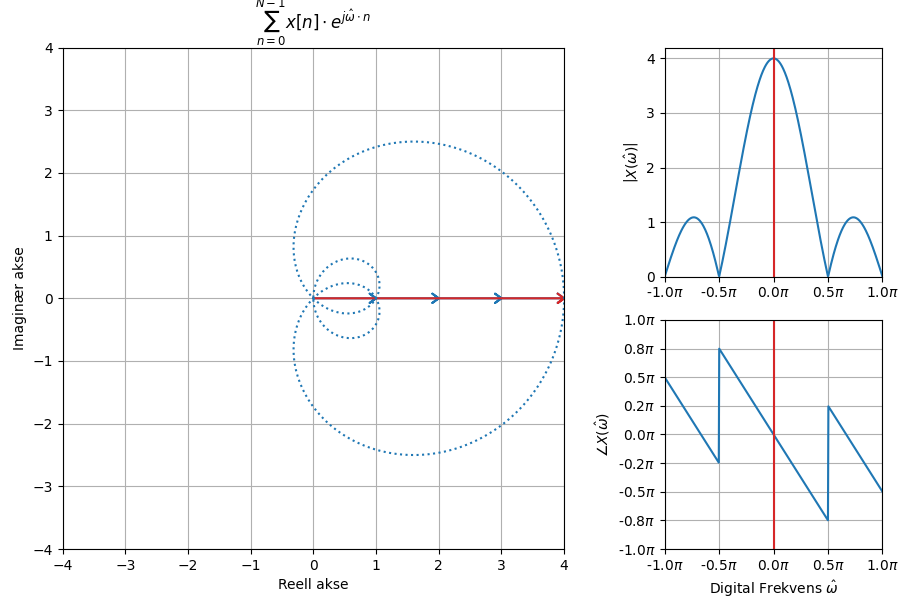

In [10]:
w_n = np.ones(4)
DTFT_demo(w_n, fig_num = 7, figsize=(9,6))

# DTFT av rektangulært vindu
* Rektangulært vindu har et generelt uttrykk for DTFT.

<img src="Figurer/07_Frekvensanalyse/Fig12_TransformPair.png" style="width: 85%; margin-left: 50px" />

# Tilbakeblikk: Amplitudemodulasjon

* Som vi utforsket i uke 35, vil multiplikasjon med en sinusbølge/sinussekvens resultere i *frekvensforskyvning*.
    * Matematisk formulering av denne relasjonen:
    
| Tidsdomene: $x[n]$ | Frekvensdomene: $X\left(\hat{\omega}\right)$ |
|:-:|:-:|
| $$w[n]\cdot cos(\hat{\omega}_0\cdot n)$$ | $$\frac{1}{2}\left(W\left(\hat{\omega}-\hat{\omega}_0\right)+W\left(\hat{\omega}+\hat{\omega}_0\right)\right)$$|

<img src="Figurer/07_Frekvensanalyse/Fig13_WindowModulation.png" style="width: 80%" />

$$\cos(\hat{\omega}_0\cdot n) = \frac{1}{2}e^{j\hat{\omega}_0n} + \frac{1}{2}e^{-j\hat{\omega}_0n}$$

# DTFT av sinusbølge-utklipp
* DTFT av signalutsnittet $x_w[n] = \cos(\hat{\omega}_0\cdot n)\cdot w_r[n]$ vil være summen av to frekvensforskjøvne kopier av $W_r\left(\hat{\omega}\right)$.

$$X_w\left(\hat{\omega}\right) = \frac{1}{2}\left(W_r\left((\hat{\omega}-\hat{\omega}_0\right)+W_r\left(\hat{\omega}+\hat{\omega}_0\right)\right)$$

<img src="Figurer/07_Frekvensanalyse/Fig14_SineDTFT.png" style="width: 60%; margin-left: 100px" />

# DFT er sampling av DTFT
* Eksempel:
    16-punkts DFT tilsvarer å ta 16 sampler langs kurven til DTFT-kurven $X_w\left(\hat{\omega}\right)$.
<img src="Figurer/07_Frekvensanalyse/Fig15_SineDFT.png" style="width: 60%; margin-left: 100px" />

# Hvordan motvirkes spektral lekkasje?

* Idealet for frekvensinnholdet av en vindusfunksjon $w_I[n]$ er en deltapuls $W_I\left(e^{j\hat{\omega}}\right) = \delta(\hat{\omega})$
<img src="Figurer/07_Frekvensanalyse/Fig16_IdealWindow.png" style="width: 60%; margin-left: 100px" />
* Dette er ikke mulig å oppnå uten et uendelig langt vindu.
    * Men vi kan finne noe som nærmer seg.

# Andre Vindusfunksjoner

* Hamming:
$$w[n] = 
\begin{cases}
0.54 - 0.46 \cos \left(2\pi \frac{n}{L-1} \right), & \ \ \ 0\leq n < 1 \\
0, & \ \ \ \text{ellers}
\end{cases}
$$
* Det finnes et utall [andre](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) også, og formlene blir fort komplisert.
* Hovedregel:
    - Mer demping i sidelobene gir bredere hovedlobe
    - Valg av vindu er en avveining mellom ønsket presisjon i frekvensplanet, og ønsket sensitivitet (evne til å plukke ut svake sinuskomponenter)

* Ved frekvensanalyse av signal er et *hammingvindu* stort sett godt nok.
* Når et signal skal behandles i "blokker" for videre rekonstruksjon er et *hann-vindu* godt egnet. 
    - Med 50% overlapping mellom blokkene vil signalet kunne flettes sammen fra blokkene uten distorsjon.
    - Pass på at vinduet som benyttes er *usymmetrisk* (`sym=False`) 

## Analsye av vindusfunksjoner med Python

In [5]:
from scipy.signal import get_window
def PlotWindow(w_n, label=None):
    DTFT_res = 1000
    N = len(w_n)
    n = np.arange(N)
    
    plt.subplot(2,1,1)
    plt.plot(n, w_n, label=label)
    plt.xlim([n[0], n[-1]])
    plt.xlabel("Samplenummer (n)")
    
    omega = np.linspace(-pi, pi, DTFT_res)
    W_k = np.fft.fft(w_n, DTFT_res)
    W_k = np.fft.fftshift(W_k)
    
    plt.subplot(2,1,2)
    plt.plot(omega, 20*np.log10(np.abs(W_k)), label=label)
    plt.xlim([-pi, pi])
    ymax = round((20*np.log10(sum(w_n))+10)/20)*20
    plt.ylim(ymax=ymax, ymin=ymax-120)
    plt.xlabel(r"Digital frekvens $\hat{\omega}$")
    
    plt.grid(True)
    plt.tight_layout()

C:\Users\kaierih\AppData\Local\Temp\ipykernel_32764\1340534540.py:7: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  wn2 = sig.hann(N)


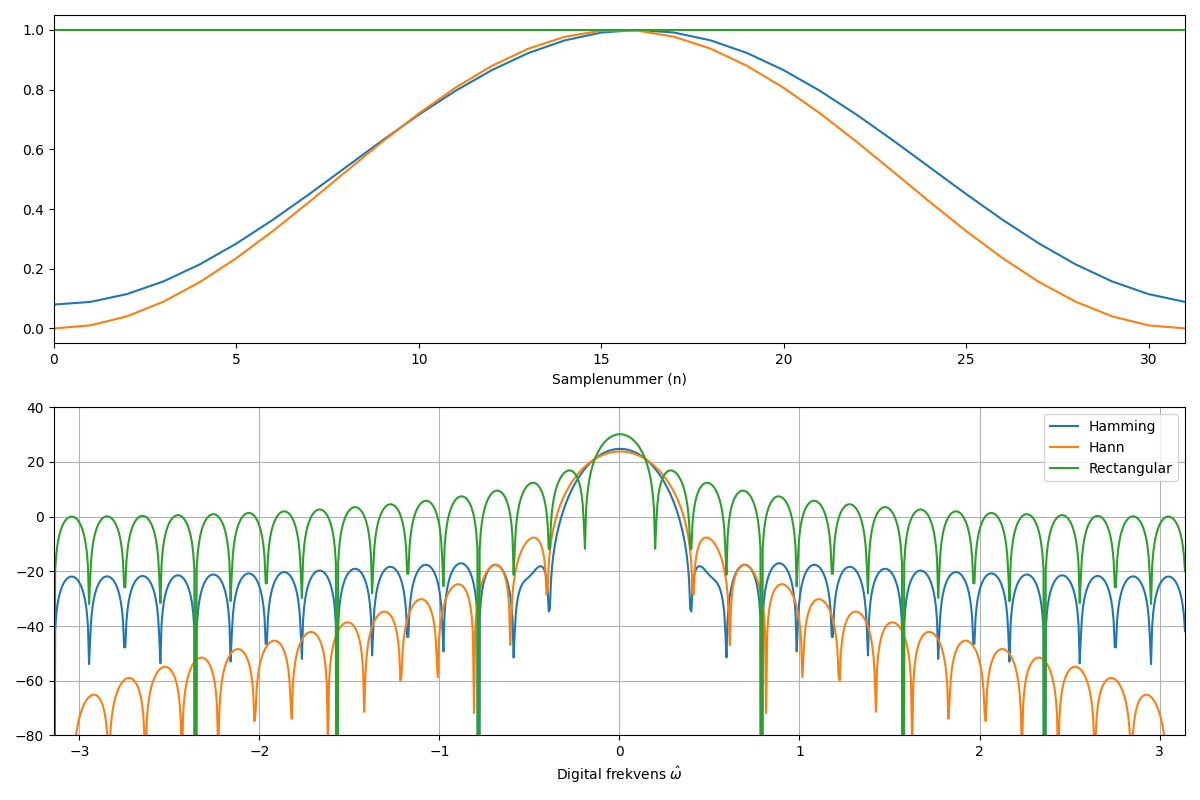

In [8]:
#%matplotlib inline
N = 32
plt.close(8); plt.figure(8, figsize=(12,8))
n = np.arange(N)
wn1 = 0.54 - 0.46*cos(2*pi*n/N)
PlotWindow(wn1, label="Hamming")
wn2 = sig.hann(N)
PlotWindow(wn2, label="Hann")
# wn3 = sig.blackman(N)
# PlotWindow(wn3, label="Blackman")
# wn4 = sig.gaussian(N, std=N//6)
# PlotWindow(wn4, label=r"Gaussian $\sigma = %d$"%(N//6))
wn5 = np.ones(N)
PlotWindow(wn5, label="Rectangular")
plt.legend()



# Oppsummering vindusfunksjoner
* Vindusfunksjoner er et verktøy i frekvensanalyse som motvirker spektral lekkasje.
    * Dette gjøres ved å multiplisere signalvinduet med lengde $N$ sampler med en tilsvarende lang vindusfunksjon før utregning av DFT.
    * Vindusfunksjonen vil "krympe" signalsamplene mot starten og slutten av vinduet.
* DTFT av vindusfunksjonen forteller oss hvordan den spektrale lekkasjen vil utarte seg.
    * To målinger vi kan gjøre:
        1. Sidelobedemping
        2. Bredde av hovedlobe
    * Typisk en invers korrelasjon mellom overnevnte egenskaper.

# Spørsmål?